In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np
# a. Loading and Preprocessing img data
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test, y_test)=mnist.load_data()
input_shape=(28,28,1)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)#we have reshape it to get channel 1D as grascale
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')#Converting x_train and x_test to float32 is done to ensure that the data type of the image arrays is compatible with deep learning frameworks, which commonly expect floating-point values for numerical stability and efficiency during computation.
x_train = x_train/255     #normalaize the data to 0 to 1 (becoz pixel value ranges betwwen 0 to 255...black 0
x_test = x_test/255
print("shape of training: ", x_train.shape)
print("shape of testing: ", x_test.shape)
# b. Defining the model's architecture
model = Sequential()  #suentially
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))    #3parameter(convlayer,kernalzise,input data)
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten()) #we want to convert  multidimenstional img into signle vector to pass hidden layer
model.add(Dense(200,activation= "relu")) #hidden layer 
model.add(Dropout(0.3))   #remove random neuron from hidden
model.add(Dense(10,activation= "softmax"))#output layer
model.summary()
# c. Training the model
model.compile(optimizer="adam",                                      
             loss="sparse_categorical_crossentropy",
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=2)            #model ko train karne ke liye compile aur fit method ka use karte hai
                                                        #parameter 3 2no mai
    # d. Estimating the model performance
test_loss,test_acc=model.evaluate(x_test,y_test)    #model.evaluate
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)
image = x_train[1]
plt.imshow(np.squeeze(image), cmap='gray')      #squeeze signgle dimentional entries remove kart# Using cmap='gray' helps show the pixel intensity in grayscale, with 0 as black and 1 (or 255 before normalization) as white.
plt.show()

image = image.reshape(1,image.shape[0], image.shape[1], image.shape[2])#4 parameter pass karne padte hai..batch size,height,width,channel
predict_model = model.predict([image])
print("predicted class: {}".format(np.argmax(predict_model)))   #max probability kontya clas chi#0-9 ch numbers ahe mg jyachi probability jast ahe tyacha class return hoil



shape of training:  (60000, 28, 28, 1)
shape of testing:  (10000, 28, 28, 1)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 28)          │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 28)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4732)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 200)                 │         946,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 948,890 (3.62 MB)

 Trainable params: 948,890 (3.62 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
1635/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8867 - loss: 0.3712

shape of training:  (60000, 28, 28, 1)
shape of testing:  (10000, 28, 28, 1)


C:\Users\tagal\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 28)          │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 28)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4732)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 200)                 │         946,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 948,890 (3.62 MB)

 Trainable params: 948,890 (3.62 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8943 - loss: 0.3444
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9722 - loss: 0.0910


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9770 - loss: 0.0681
Loss=0.056
Accuracy=0.981


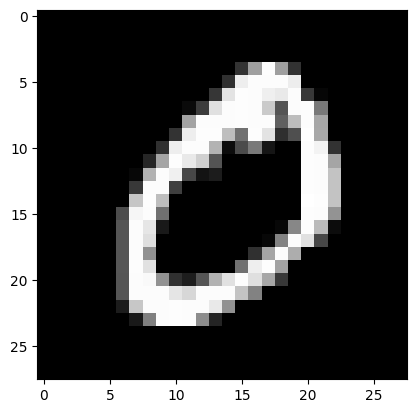

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
predicted class: 0


C:\Users\Akanksha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: keras_tensor_22. Received: the structure of inputs=('*',)
  warnings.warn(
